# Phase II: Eye Detection

In this part, we implement eye detection from any single image using OpenCV. We used the already trained model, so the dataset is unnecessary and the single images in `./img/` are used as an example. 

## 0. Setup

Before running the codes, please install the packages and download the model by the following command: 

In [1]:
# ! pip install opencv-python numpy dlib imutils
# ! wget https://github.com/tzutalin/dlib-android/raw/master/data/shape_predictor_68_face_landmarks.dat

## 1. Define the functions

We define the following functions:

 - `detect_face_eye`: 
  - Input: an image (NumPy array);
  - Outputs: a 1D array denoting faces' coordinates (e.g. [[(start_x, start_y), (end_x, end_y)], ......]) and a 2D array denoting eyes' coordinates in each face (e.g. [[[(start_x, start_y), (end_x, end_y)], ......], [[(start_x, start_y), (end_x, end_y)], ......], ......]). 
 - `plot_face_eye`: 
  - Input: an image (NumPy array), faces' coordinates, and eyes' coordinates (same as the output of `detect_face_eye`);
  - Output: a plotted image (NumPy array)

In [2]:
import cv2 # for reading images
import dlib  # for face and landmark detection
import imutils
from imutils import face_utils

from matplotlib import pyplot as plt
import numpy as np

In [3]:
def detect_face_eye(img): 
    # Converting the recorded image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Applying filter to remove impurities
    gray = cv2.bilateralFilter(gray, 5,1, 1)
    
    '''*** First Version: ***
    # Initializing the face and eye cascade classifiers from xml files
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    # Detecting the face for region of image to be fed to eye classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(50, 50))
    
    # Detecting eyes for each face
    eyes_per_face = []
    for (x,y,w,h) in faces:
        img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        # roi_face is face which is input to eye classifier
        roi_face = gray[y:y+h,x:x+w]
        roi_face_clr = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_face, 1.3, 5, minSize=(20, 20))
        eyes_per_face.append(eyes)
    '''
    
    '''*** Second Version: This version is more accurate. ***
    '''
    # Eye landmarks
    (L_start, L_end) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (R_start, R_end) = face_utils.FACIAL_LANDMARKS_IDXS['right_eye']

    # Initializing the Models for Landmark and face Detection
    detector = dlib.get_frontal_face_detector()
    landmark_predict = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
    
    # Detecting the faces
    faces = detector(gray)
    
    # Detecting eyes for each face
    faces_coors = []
    eyes_per_face = []
    for face in faces: 
        # Converting faces rectangle to coordinates
        faces_coors.append([(face.left(), face.top()), (face.right(), face.bottom())])
        
        shape = landmark_predict(gray, face)
        # Converting the shape class directly to a list of (x,y) coordinates
        shape = face_utils.shape_to_np(shape)
        
        # Parsing the landmarks list to extract lefteye and righteye landmarks
        lefteye = np.array(shape[L_start: L_end])
        x11 = lefteye[:, 0].min()
        y11 = lefteye[:, 1].min()
        x12 = lefteye[:, 0].max()
        y12 = lefteye[:, 1].max()
        
        righteye = np.array(shape[R_start: R_end])
        x21 = righteye[:, 0].min()
        y21 = righteye[:, 1].min()
        x22 = righteye[:, 0].max()
        y22 = righteye[:, 1].max()
        
        eyes_per_face.append([[(x11, y11), (x12, y12)], [(x21, y21), (x22, y22)]])
    return faces_coors, eyes_per_face

In [4]:
def plot_face_eye(img, faces, eyes_per_face, mode='xywh'):
    # colors
    red = (255, 0, 0)
    blue = (0, 0, 255)
    
    # Line thickness of 2 px
    thickness = 2
    
    '''*** First Version: ***
    # Drawing the rectangles
    img_res = img
    for i, f in enumerate(faces): 
        x, y, w, h = f
        start_f = (x, y)
        end_f = (x + w, y + h)
        img_res = cv2.rectangle(img_res, start_f, end_f, blue, thickness)
        
        for e in eyes_per_face[i]:
            e_x, e_y, e_w, e_h = e
            start_e = (x + e_x, y + e_y)
            end_e = (x + e_x + e_w, y + e_y + e_h)
            img_res = cv2.rectangle(img_res, start_e, end_e, red, thickness)
    '''
    
    '''*** Second Version: ***
    '''
    # Drawing the rectangles
    img_res = img
    for i, f in enumerate(faces): 
        start_f, end_f = f
        img_res = cv2.rectangle(img_res, start_f, end_f, blue, thickness)
        
        for e in eyes_per_face[i]:
            start_e, end_e = e
            img_res = cv2.rectangle(img_res, start_e, end_e, red, thickness)
    return img_res

## 2. Apply the eye detection function

### Example 1: 

In [5]:
# Read the image
path = './img/eye_detect3.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

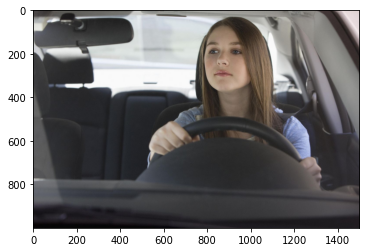

In [6]:
# Show the input image
plt.imshow(img)
plt.show()

In [7]:
faces, eyes_per_face = detect_face_eye(img)

In [8]:
faces

[[(758, 137), (973, 352)]]

In [9]:
eyes_per_face

[[[(910, 184), (951, 197)], [(814, 185), (851, 198)]]]

In [10]:
plotted_img = plot_face_eye(img, faces, eyes_per_face)

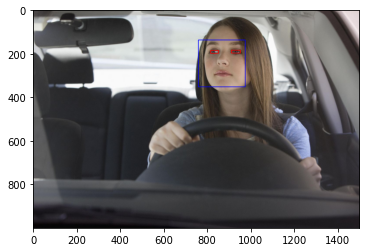

In [11]:
# Show the input image
plt.imshow(plotted_img)
plt.show()

### Example 2: 

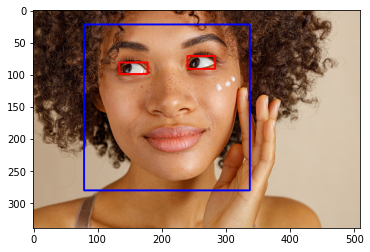

In [12]:
# Read the image
path = './img/eye_detect2.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces, eyes_per_face = detect_face_eye(img)
plotted_img = plot_face_eye(img, faces, eyes_per_face)

# Show the input image
plt.imshow(plotted_img)
plt.show()

### Example 3: 

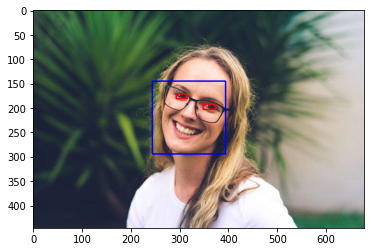

In [13]:
# Read the image
path = './img/eye_detect1.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces, eyes_per_face = detect_face_eye(img)
plotted_img = plot_face_eye(img, faces, eyes_per_face)

# Show the input image
plt.imshow(plotted_img)
plt.show()